# ***Predictive Modeling of Coronary Heart Disease Using K-Nearest Neighbors (KNN): Feature Selection, Significance Analysis, and Performance Evaluation***

# ***Table of content***

>[Predictive Modeling of Coronary Heart Disease Using K-Nearest Neighbors (KNN): Feature Selection, Significance Analysis, and Performance Evaluation](#scrollTo=KvW8CYpjggwx)

>>[Introduction](#scrollTo=Q7HyFJtWSxry)

>>[Objectives](#scrollTo=GRoMjxZhdeS8)

>>[Data description:](#scrollTo=YVknwFUZYwDU)

>>[Exploratory Data Analysis](#scrollTo=rv2FL-bbqWWR)

>>>[Statistical Summary](#scrollTo=P6VV51HbuGJ4)

>>>[Null and Zero values](#scrollTo=QBequiqntEnp)

>>>[Variable Information](#scrollTo=bBP6M8LLulnK)

>>>[Graphical Representation](#scrollTo=WzBoJmkKkuW_)

>>>[Pi-chart for the variables 'chd' and 'famhist'](#scrollTo=WzBoJmkKkuW_)

>>>>[Box-plot of age of males in having being affected with the coronary heart disease](#scrollTo=Po1wCprJk-Ir)

>>>>[Box-plot of tobacco consumption relating with the coronary heart disease](#scrollTo=juwlBb8UI2s5)

>>>>[Correlation matrix](#scrollTo=EUEgiaPILTOG)

>>>>[Independent sample t-test](#scrollTo=qYP1JxHHLfhh)

>>>>[CHD - Si Pie Chart:](#scrollTo=hi0jOAqEhKVc)

>>>>[CHD - No Pie Chart:](#scrollTo=hi0jOAqEhKVc)

>>>>[Chisquare test for the comparision of two categorical variables](#scrollTo=Xpf_qaaovnKv)

>>[Building the KNN Model](#scrollTo=nfmUzDv64Axa)

>>[To find out which features are statistically significant in the KNN Classification model built in above model.](#scrollTo=Hy0VgHiJ4YJz)

>>>>[Confusion matrix](#scrollTo=5cl2eBC6Di37)

>>>>[Precision and Recall](#scrollTo=1vaYTdc6EXlO)

>>[Conclusion](#scrollTo=_szCXaz6_YL2)



## ***Introduction***

The K-Nearest Neighbors (KNN) model is a simple yet effective supervised machine learning algorithm used for classification and regression tasks. In KNN, the prediction for a given data point is based on the majority class or average value of its nearest neighbors in the feature space. The model operates on the principle that similar data points tend to belong to the same class or have similar numerical values. KNN does not involve explicit training; instead, it memorizes the entire training dataset and uses it during the prediction phase. The key hyperparameter in KNN is 'k', representing the number of nearest neighbors to consider. KNN is intuitive, easy to understand, and robust to noisy data, making it particularly useful for small to medium-sized datasets. However, its performance may degrade with high-dimensional data due to the curse of dimensionality, and it can be computationally expensive during prediction, especially with large datasets. Despite its limitations, KNN remains a popular choice for its simplicity and effectiveness in various classification and regression tasks.

We will see the applications of this concept further in the report.

## ***Objectives***

The objective of this report is to build a KNN model to predict the probability of getting ***CHD (Coronary Heart Disease)*** where we have used all other columns except "chd" as features to build the model. Then we are required to find out which features are statistically significant in the KNN Classification model built and then build a new KNN model using only the significant features. Latly, we are required to build a confusion matrix and report the precision and recall of the model.


## ***Data description:***

Link for dataset:

https://drive.google.com/file/d/1U-gs4VltYpp6hmd9n3OsEWPFdX0-LXZk/view?usp=sharing


The data deals about a retrospective sample of males in a heart-disease high-risk region of the Western Cape, South Africa.
There are roughly two controls per case of coronary heart disease. For many of the coronary heart disease that turned out
positive, men have undergone blood pressure reduction treatment and other programs to reduce their risk
factors after their coronary heart disease event. In some cases the measurements were made after these
treatments.

This data are taken from a larger dataset,
described in Rousseauw et al. (1983), South African Medical Journal.

Below is a description of the variables:
1. sbp: systolic blood pressure
2. tobacco: cumulative tobacco (kg)
3. ldl: low densiity lipoprotein cholesterol
4. adiposity: degree of fattiness or amount of fat, especially in a particular region of the body
5. famhist: family history of heart disease (Present, Absent)
6. typea: type-A behavior
7. obesity: abnormal or excessive fat accumulation that presents a risk to health
8. alcohol: current alcohol consumption
9. age: age at onset
10. chd: coronary heart disease

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
Data = pd.read_csv("/content/drive/MyDrive/SML/Datasets/SAheart.csv")
Data

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,Si
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,Si
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,No
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,Si
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,Si
...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,No
458,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,Si
459,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,No
460,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,No


## ***Exploratory Data Analysis***

In [ ]:
Data.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,Si
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,Si
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,No
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,Si
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,Si


In [ ]:
Data.tail()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
457,214,0.4,5.98,31.72,Absent,64,28.45,0.00,58,No
458,182,4.2,4.41,32.10,Absent,52,28.61,18.72,52,Si
459,108,3.0,1.59,15.23,Absent,40,20.09,26.64,55,No
460,118,5.4,11.61,30.79,Absent,64,27.35,23.97,40,No
461,132,0.0,4.82,33.41,Present,62,14.70,0.00,46,Si


The above code snippets gave us the first five and the last five observations from the dataset respectively.

In [ ]:
Data.shape

(462, 10)

The data has 462 observations on 10 variables.

### *Statistical Summary*

In [ ]:
Data.describe()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,53.103896,26.044113,17.044394,42.816017
std,20.496317,4.593024,2.070909,7.780699,9.817534,4.213680,24.481059,14.608956
min,101.000000,0.000000,0.980000,6.740000,13.000000,14.700000,0.000000,15.000000
25%,124.000000,0.052500,3.282500,19.775000,47.000000,22.985000,0.510000,31.000000
50%,134.000000,2.000000,4.340000,26.115000,53.000000,25.805000,7.510000,45.000000
75%,148.000000,5.500000,5.790000,31.227500,60.000000,28.497500,23.892500,55.000000
max,218.000000,31.200000,15.330000,42.490000,78.000000,46.580000,147.190000,64.000000


462 samples are provided in this data concerning with 10 variables listed above.

The average tobacco consumption is 3.63 kg.

Males around an average age of 43 years are a part of this dataset including a wide range of young males of 15 years to old of 64 years.

Some people are found to be neither tobacco nor alcohol consumer, but are still in a dataset of heart disease with high risk, and that gives us the reason to dive deep into the underlying reasons behind it.

Furthermore, we can can infer that:

*   Only 25% of samples have ldl over 5.79.
*   Only 25% of samples have tobacco over 5.50.
*   The mean consumption of alcohol is 17.044%.
*   The average obesity of the samples is 26.044%.


### *Null and Zero values*

In [ ]:
# Checking for null values if any
null_values = Data.isnull().sum()

# Total count of null values for each column
print("Null Values:")
print(null_values)

Null Values:
sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64


The data doesn't contain any null values.

In [ ]:
# Checking for the columns that contains zeros
col_0 = Data.columns[(Data == 0).any()]
print(col_0)

Index(['tobacco', 'alcohol'], dtype='object')


Only the columns with variables "tobacco" and "alcohol" contains zero values, but the zeros have meaning in the data, it is that the person who doesn't consume alcohol or tobacco comes under this category.

### *Variable Information*

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        462 non-null    int64  
 1   tobacco    462 non-null    float64
 2   ldl        462 non-null    float64
 3   adiposity  462 non-null    float64
 4   famhist    462 non-null    object 
 5   typea      462 non-null    int64  
 6   obesity    462 non-null    float64
 7   alcohol    462 non-null    float64
 8   age        462 non-null    int64  
 9   chd        462 non-null    object 
dtypes: float64(5), int64(3), object(2)
memory usage: 36.2+ KB


Except 'Family history' and 'Coronary heart disease', all the other variables are numeric in nature. The rest two fall under categorical category, where categories can be assigned 0 and 1 to change them to numeric.

In [ ]:
Data['chd'].value_counts()

chd
No    302
Si    160
Name: count, dtype: int64

Here, there were 160 people who underwent coronary heart disease(CHD) and the remaining 302 persons don't have coronary heart disease(CHD).

In [ ]:
Data['famhist'].value_counts()

famhist
Absent     270
Present    192
Name: count, dtype: int64

In the family history of coronary heart disease there are 192 present cases and 270 absent cases.

### *Graphical Representation*

###Pi-chart for the variables 'chd' and 'famhist'

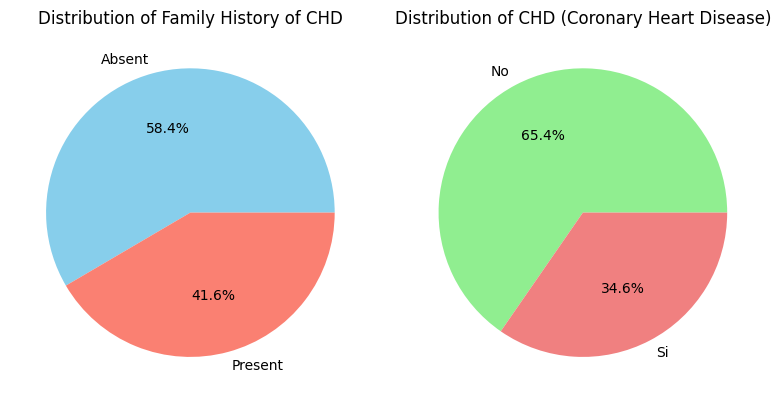

In [ ]:
famhist_counts = Data['famhist'].value_counts()
chd_counts = Data['chd'].value_counts()

# Plot pie chart for 'famhist'
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.pie(famhist_counts, labels=famhist_counts.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Distribution of Family History of CHD')

# Plot pie chart for 'chd'
plt.subplot(1, 2, 2)
plt.pie(chd_counts, labels=chd_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title('Distribution of CHD (Coronary Heart Disease)')

plt.tight_layout()
plt.show()

The variables "chd" and "famhist" is visualized separately via pi-charts.

It is seen that the number of people who don't have chd(65.4%) is more than those who have chd(34.6%), also in the distribution of family history the no.of absent cases(58.4) outranges the present cases(41.6%).

#### *Box-plot of age of males in having being affected with the coronary heart disease*

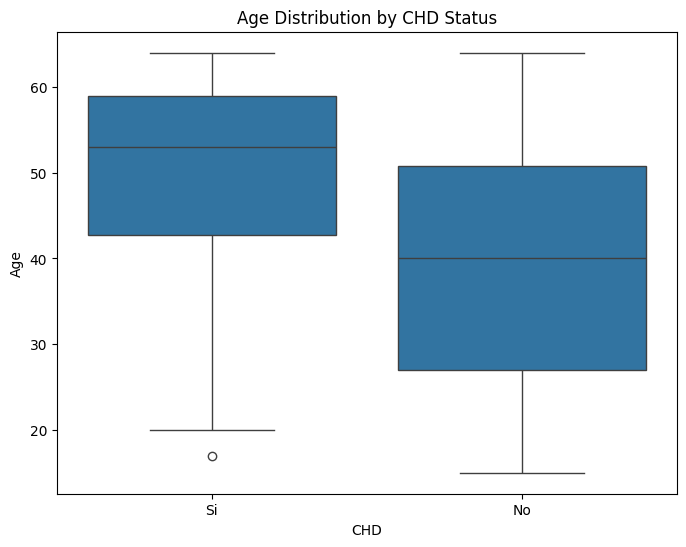

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='chd', y='age', data=Data)
plt.title('Age Distribution by CHD Status')
plt.xlabel('CHD')
plt.ylabel('Age')
plt.show()

Based on the above boxplot for the age distribution by chd, the people who are aged above 40 are likely to have chd, than those below the age 40.

The distribution of age among people not having the disease is wider, that means it's not a prenotioned thing that older people are more prone to heart diseases and are more likely, there are cases contradicting it.
Again, for the plot showing Si(having heart disease) there is an outlier who is a person of around age 15, rare but still belongs to the category.

#### *Box-plot of tobacco consumption relating with the coronary heart disease*

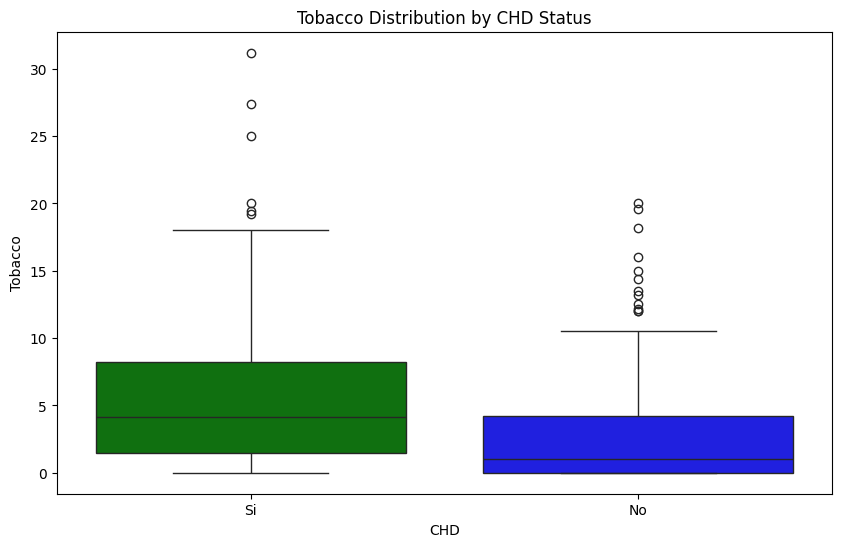

In [ ]:
colors = ['green', 'blue']
plt.figure(figsize=(10, 6))
sns.boxplot(x='chd', y='tobacco', hue = 'chd', data=Data, palette = ['green', 'blue'], legend = False)
plt.title('Tobacco Distribution by CHD Status')
plt.xlabel('CHD')
plt.ylabel('Tobacco')
plt.show()

From the box plot, we observe that individuals with coronary heart disease (CHD) tend to have higher levels of tobacco consumption compared to those without CHD. This suggests a potential association between tobacco use and the risk of developing CHD.

#### *Correlation matrix*

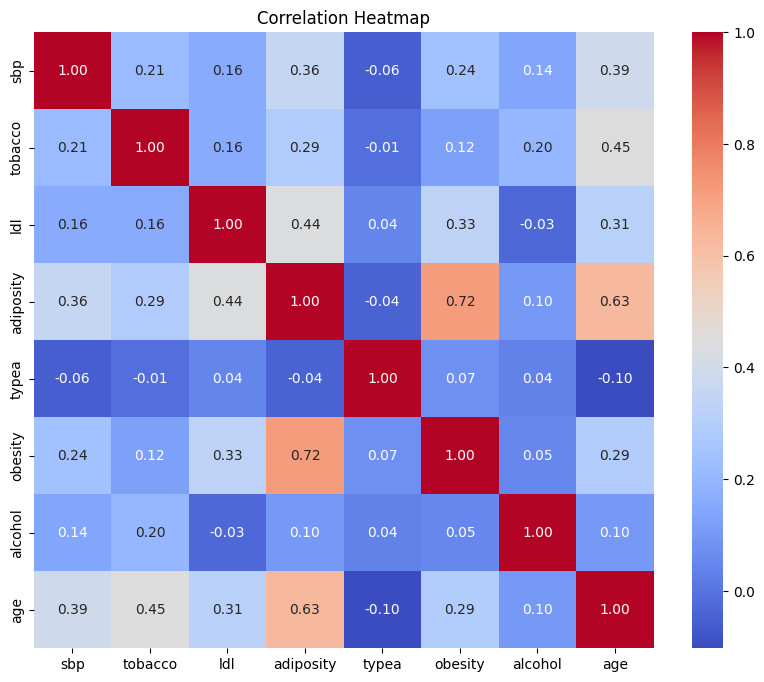

In [ ]:
correlation_matrix = Data.corr(numeric_only = True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

1. The correlation matrix for the nominal variables is shown via heatmap. We know that the range of the correlation is -1 to 1; the dark blue indicates "0", which means that the variables are not correlated and red indicates "1", which means that the variables are highly correlated.

2. A moderate to strong postive correlation can be seen between the variables obesity and adiposity, age and adiposity whose values are **0.72** and **0.63** respectively. This shows as age increases it gives raise to adiposity and obesity.

#### ***Independent sample t-test***

Testing for the significance on adiposity levels on individuals with CHD.

1.  We first extract the adiposity levels for individuals with and without CHD by filtering the data based on the 'chd' column.

2.  We then use the "ttest_ind" function to perform the independent samples t-test between the two groups.

3.  The t_statistic represents the calculated t-statistic value, and the p_value represents the probability of observing the given results if the null hypothesis (no difference in means) is true.

4.  Finally, we interpret the results based on the p-value. If the p-value is less than the chosen significance level (alpha), typically 0.05, we reject the null hypothesis and conclude that there is a statistically significant difference in adiposity levels between individuals with and without CHD. Otherwise, we fail to reject the null hypothesis. Adjust the alpha value as needed based on your desired level of significance.

In [ ]:
from scipy.stats import ttest_ind

# Extract adiposity levels for individuals with and without CHD
adiposity_no_chd = Data[Data['chd'] == 'No']['adiposity']
adiposity_si_chd = Data[Data['chd'] == 'Si']['adiposity']

# Perform t-test
t_statistic, p_value = ttest_ind(adiposity_no_chd, adiposity_si_chd)

# Results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Alternative hypothesis: There is a statistically significant difference in adiposity levels between individuals with and without CHD.")
else:
    print("Null hypothesis: There is no statistically significant difference in adiposity levels between individuals with and without CHD.")

T-Statistic: -5.635290062988449
P-Value: 3.050507732724932e-08
Alternative hypothesis: There is a statistically significant difference in adiposity levels between individuals with and without CHD.


The p-value is less than the significance level, so we reject the null hypothesis and conclude that there is a significant difference in adiposity levels between individuals with and without CHD.

Testing for the significance on SBP levels on individuals with CHD.

*   We first extract the SBP levels for individuals with and without CHD by filtering the DataFrame based on the 'chd' column.

*   We then use the ttest_ind function to perform the independent samples t-test between the two groups.

*   The t_statistic represents the calculated t-statistic value, and the p_value represents the probability of observing the given results if the null hypothesis (no difference in means) is true.

*   Finally, we interpret the results based on the p-value. If the p-value is less than the chosen significance level (alpha), typically 0.05, we reject the null hypothesis and conclude that there is a statistically significant difference in SBP levels between individuals with and without CHD. Otherwise, we fail to reject the null hypothesis. Adjust the alpha value as needed based on your desired level of significance.


In [ ]:
# Extract SBP levels for individuals with and without CHD
sbp_no_chd = Data[Data['chd'] == 'No']['sbp']
sbp_si_chd = Data[Data['chd'] == 'Si']['sbp']

# Perform t-test
t_statistic, p_value = ttest_ind(sbp_no_chd, sbp_si_chd)

# Results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Alternative hypothesis: There is a statistically significant difference in SBP levels between individuals with and without CHD.")
else:
    print("Null hypothesis: There is no statistically significant difference in SBP levels between individuals with and without CHD.")

T-Statistic: -4.204044124452311
P-Value: 3.151599323951774e-05
Alternative hypothesis: There is a statistically significant difference in SBP levels between individuals with and without CHD.


Here the p-value is less than the significance level, so the null hypothesis gets rejected and we conclude that there exists a significant difference in sbp levels between individuals with and without CHD.





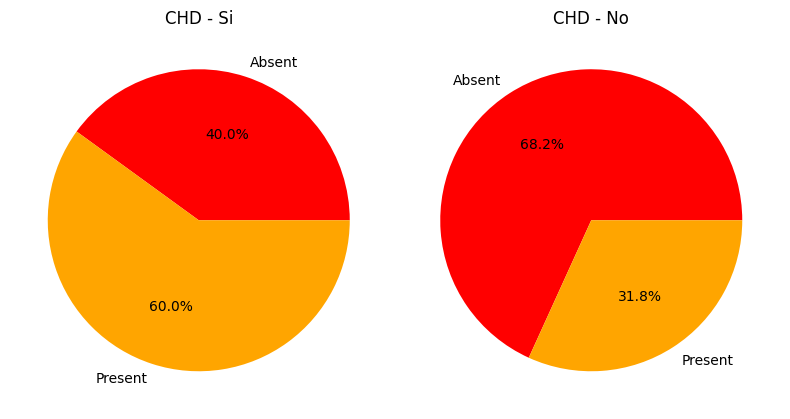

In [ ]:
# Create a contingency table between 'famhist' and 'chd'
contingency_table = pd.crosstab(Data['famhist'], Data['chd'])

# pie chart
plt.figure(figsize=(8, 6))

# Plot 'Si' category of 'chd'
plt.subplot(1, 2, 1)
plt.pie(contingency_table['Si'], labels=contingency_table.index, autopct='%1.1f%%', colors=['Red', 'Orange'])
plt.title('CHD - Si')

# Plot 'No' category of 'chd'
plt.subplot(1, 2, 2)
plt.pie(contingency_table['No'], labels=contingency_table.index, autopct='%1.1f%%', colors=['Red', 'Orange'])
plt.title('CHD - No')

plt.tight_layout()
plt.show()


The pie chart is for comparing the distribution of 'famhist' (Family History of Coronary Heart Disease) within each category of 'chd' (Coronary Heart Disease), we can make the following observations:

####CHD - Si Pie Chart:

The pie chart on the left represents the distribution of 'famhist' categories ('Present' and 'Absent') among individuals who have Coronary Heart Disease (CHD).
We can see the proportions of individuals with and without a family history of CHD among those who have CHD.


####CHD - No Pie Chart:

The pie chart on the right represents the distribution of 'famhist' categories ('Present' and 'Absent') among individuals who do not have Coronary Heart Disease (CHD).
We can see the proportions of individuals with and without a family history of CHD among those who do not have CHD.


Based on these observations, we can make conclusions regarding the relationship between family history of CHD ('famhist') and the presence or absence of CHD ('chd').

**For example:**
If there is a significant difference in the proportions of 'Present' and 'Absent' categories within each category of 'chd', it may suggest a relationship between family history and the presence of CHD.


If the proportions are similar across both categories of 'chd', it may indicate that family history is not a strong predictor of CHD in this dataset.

**From the pie chart there is a clear indicator that there is a significant difference in the proportions of 'Present' and 'Absent' categories within each category of 'chd'.**

But it's important to perform statistical tests, such as chi-square tests, to validate any conclusions drawn from the visualization.

#### *Chisquare test for the comparision of two categorical variables*

1. We first create a contingency table using pd.crosstab() between the categorical variables 'chd' and 'famhist'.

2. We then use the chi2_contingency function to perform the chi-square test of independence.

3. The chi2_statistic represents the calculated chi-square test statistic, and the p_value represents the probability of observing the given results if the null hypothesis (no relationship between the variables) is true.

4. The dof represents the degrees of freedom, and expected represents the expected frequencies under the null hypothesis.

5. Finally, we interpret the results based on the p-value. If the p-value is less than the chosen significance level (alpha), typically 0.05, we reject the null hypothesis and conclude that there is a relationship between 'chd' and 'famhist'. Otherwise, we fail to reject the null hypothesis. Adjust the alpha value as needed based on your desired level of significance.

In [ ]:
from scipy.stats import chi2_contingency

# chi-square test
chi2_statistic, p_value, dof, expected = chi2_contingency(contingency_table)

# Results
print("Chi-square Statistic:", chi2_statistic)
print("P-Value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Alternative hypothesis: There is a relationship between 'chd' and 'famhist'.")
else:
    print("Null hypothesis: There is no relationship between 'chd' and 'famhist'.")

Chi-square Statistic: 33.1226039295323
P-Value: 8.652695462627767e-09
Degrees of Freedom: 1
Expected Frequencies:
 [[176.49350649  93.50649351]
 [125.50649351  66.49350649]]
Alternative hypothesis: There is a relationship between 'chd' and 'famhist'.


The p-value is lesser than the significance level[0.05], so we reject the null hypothesis and conclude there exists a significant relationship between 'chd' and 'famhist'.

## ***Building the KNN Model***

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import preprocessing

In [ ]:
# Mapping of the features
chd_set=set(Data["chd"])
Data["chd"]=Data["chd"].map({"No":0,"Si":1}).astype(int)
Data["famhist"]=Data["famhist"].map({"Absent":0,"Present":1}).astype(int)
print(Data.head())

   sbp  tobacco   ldl  adiposity  famhist  typea  obesity  alcohol  age  chd
0  160    12.00  5.73      23.11        1     49    25.30    97.20   52    1
1  144     0.01  4.41      28.61        0     55    28.87     2.06   63    1
2  118     0.08  3.48      32.28        1     52    29.14     3.81   46    0
3  170     7.50  6.41      38.03        1     51    31.99    24.26   58    1
4  134    13.60  3.50      27.78        1     60    25.99    57.34   49    1


Here we have mapped the variable "chd" where the category "No" is mapped to 0 and "Si" is mapped to 1.

We have also mapped the variable "famhist" where the category "Absent" is mapped to 0 and "Present" is mapped to 1.

This type of preprocessing is common before applying machine learning algorithms that require numerical input.

In [ ]:
#Segregating the data into X, i.e, Input or Independent variables
X = Data.iloc[:, :-1].values
X

array([[1.600e+02, 1.200e+01, 5.730e+00, ..., 2.530e+01, 9.720e+01,
        5.200e+01],
       [1.440e+02, 1.000e-02, 4.410e+00, ..., 2.887e+01, 2.060e+00,
        6.300e+01],
       [1.180e+02, 8.000e-02, 3.480e+00, ..., 2.914e+01, 3.810e+00,
        4.600e+01],
       ...,
       [1.080e+02, 3.000e+00, 1.590e+00, ..., 2.009e+01, 2.664e+01,
        5.500e+01],
       [1.180e+02, 5.400e+00, 1.161e+01, ..., 2.735e+01, 2.397e+01,
        4.000e+01],
       [1.320e+02, 0.000e+00, 4.820e+00, ..., 1.470e+01, 0.000e+00,
        4.600e+01]])

For the independent variables we have taken all the rows and all the columns except the last column which is "chd".

In [ ]:
#Segregating the data into Y, i.e, Output or Dependent variables
Y=Data.iloc[:,-1].values
Y

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,

For the dependent variable we have taken all the rows and only the last column which is "chd".

In [ ]:
#Splitting the dataset into Train and Test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

We have split the dataset into train and test data where the train data consists of 75% of the dataset and the test data consists of 25% of the dataset.

0.39655172413793105
0.3620689655172414
0.4224137931034483
0.35344827586206895
0.3620689655172414
0.3706896551724138
0.3275862068965517
0.33620689655172414
0.31896551724137934
0.3017241379310345
0.3017241379310345
0.29310344827586204
0.29310344827586204
0.28448275862068967
0.28448275862068967
0.3275862068965517
0.33620689655172414
0.3275862068965517
0.3275862068965517
0.3103448275862069
0.31896551724137934
0.33620689655172414
0.3275862068965517
0.3706896551724138
0.35344827586206895
0.3706896551724138
0.3706896551724138
0.3620689655172414
0.33620689655172414
0.3448275862068966
0.3103448275862069
0.33620689655172414
0.33620689655172414
0.3448275862068966
0.33620689655172414
0.3448275862068966
0.33620689655172414
0.3275862068965517
0.33620689655172414


Text(0, 0.5, 'Mean Error')

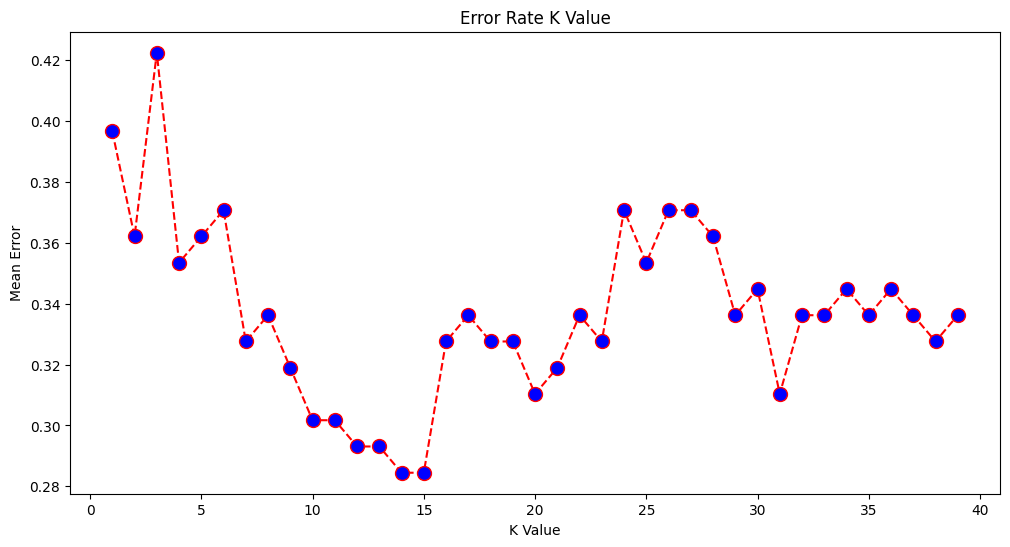

In [ ]:
#Finding the best k-value
error = []
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Calculating error for K values between 1 and 39
for i in range(1, 40):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, Y_train)
    pred_i = model.predict(X_test)
    error.append(np.mean(pred_i != Y_test))
    print(np.mean(pred_i != Y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

This helps us to determine the optimal value of K for the KNN classifier based on the mean error rate. The K value with the lowest mean error rate on the test set may be considered the best choice for the classifier. This process is commonly known as hyperparameter tuning.






In [ ]:
#Training
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 15, metric = 'minkowski', p = 2)
model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=15)

This creates a KNN classifier object with 15 neighbors, using the Minkowski distance metric with p=2 (which corresponds to Euclidean distance). Then, it trains the classifier using the provided training data and labels. Once trained, the model is ready to make predictions on new, unseen data.

In [ ]:
#Predicting whether or not a person will have coronory heart disease
sys_bp = int(input("Enter New Patients's Systolic blood pressure: "))
cum_tobacco = float(input("Enter New Patient's cumulative tobacco consumption: "))
ldl_cho= float(input("Enter New Patient's low density lipoprotein cholestrol: "))
adi = float(input("Enter New Patient's Adiposity: "))
hist = int(input("Enter New Patients's family history: "))
type_a_behaviour = int(input("Enter New Patient's type-a behaviour: "))
obe = float(input("Enter New Patient's Obesity: "))
acl = float(input("Enter New Patient's Alcohol consumption: "))
age = int(input("Enter New Patient's Age: "))
newPatient = [[sys_bp,cum_tobacco,ldl_cho,adi,hist,type_a_behaviour,obe,acl,age]]
result = model.predict(newPatient)
print(result)

if result == 1:
  print("The Patient might have coronory heart disease")
else:
  print("The Patient might not have coronory heart disease")

Enter New Patients's Systolic blood pressure: 140
Enter New Patient's cumulative tobacco consumption: 5
Enter New Patient's low density lipoprotein cholestrol: 4.78
Enter New Patient's Adiposity: 35.69
Enter New Patients's family history: 0
Enter New Patient's type-a behaviour: 50
Enter New Patient's Obesity: 40
Enter New Patient's Alcohol consumption: 55
Enter New Patient's Age: 78
[0]
The Patient might not have coronory heart disease


This code essentially serves as an interface where a user can input various health parameters of a new patient, and based on those inputs, the model predicts the likelihood of the patient having coronary heart disease. The output provides an indication of whether the patient is at risk of CHD based on the provided health parameters and the trained model's predictions.

In [ ]:
#Prediction for all the test data
Y_pred = model.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]]


This printed output provides a side-by-side comparison between the predicted labels and the actual labels for the test dataset. It helps in assessing the performance of the KNN classifier by observing how well the predicted labels match the true labels. Misclassifications and the overall accuracy of the model can be inferred from this comparison.

Confusion Matrix:
 [[69  8]
 [25 14]]
Accuracy of the Model: 71.55172413793103%


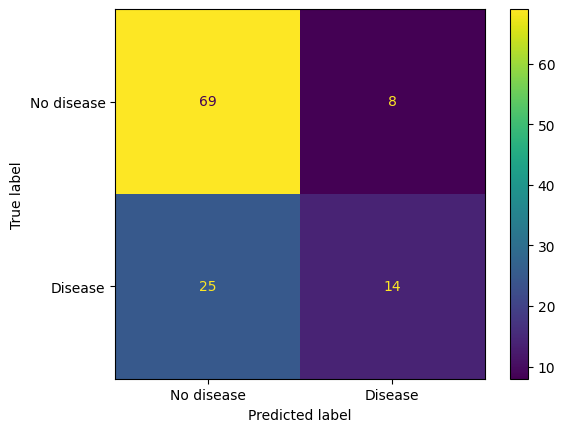

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy of the Model: {0}%".format(accuracy_score(Y_test, Y_pred)*100))
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=['No disease','Disease'])
cm_display.plot()

Accuracy is a common evaluation metric used to measure the overall performance of a classification model. It represents the proportion of correctly classified instances out of the total instances evaluated. The accuracy of our model is 71.55%.

The confusion matrix tells us that:

The true positive rate is 14, that is, 14 people have CHD and was correctly predicted to have CHD.

The false positive rate is 8, that is, 8 people did not have CHD and were wrongly prdicted to have CHD.

The false negative rate is 25, that is, 25 people had CHD but were wrongly prdicted to not have CHD.

The true negative rate is 69, that is, 69 people do not had CHD and was correctly prdicted to not have CHD.

## ***To find out which features are statistically significant in the KNN Classification model built in above model.***

To check for statistically significant features for the dependent variable, we simply use correlation matrix. This correlation matrix is used by keeping in mind that the correlation between the independent varibles should be less/minimum.

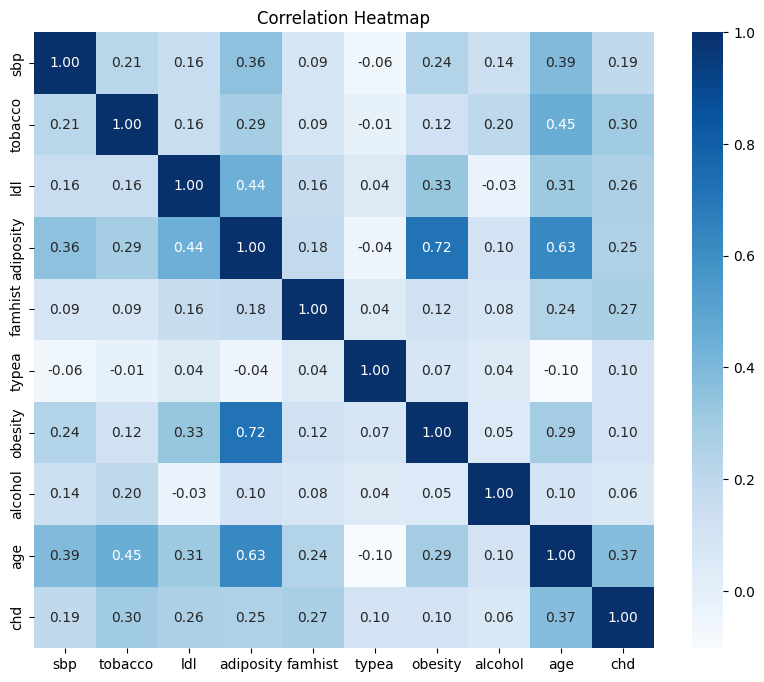

In [ ]:
correlation_matrix = Data.corr(numeric_only = True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

On analysis of correlation from the above matrix for each feature within themselves, the features which seem to be siginificant are
1. sbp
2. tobacco
3. famhist
4. typea
5. alcohol

Now, we build the KNN model with the above are the significant features.

In [ ]:
X_new=Data[['sbp','tobacco','famhist','typea','alcohol']]
X_new
Y_new=Data['chd']
Y_new

X_train,X_test,y_train,y_test=train_test_split(X_new,Y_new,test_size=0.25,random_state=0)

We have divided the dataset into independent variables and a dependent variable which is "chd". For the independent variables we have taken the only variables which are significantly correlated to "chd".

In [ ]:
X_train.info() #Checking the datatypes of the independent variables.

<class 'pandas.core.frame.DataFrame'>
Index: 346 entries, 247 to 172
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sbp      346 non-null    int64  
 1   tobacco  346 non-null    float64
 2   famhist  346 non-null    int64  
 3   typea    346 non-null    int64  
 4   alcohol  346 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 16.2 KB


We see that sbp, famhist and typea are integer variables while tobacco and alcohol are float variables.

In [ ]:
y_train.info() #Checking the datatype of the dependent variable.

<class 'pandas.core.series.Series'>
Index: 346 entries, 247 to 172
Series name: chd
Non-Null Count  Dtype
--------------  -----
346 non-null    int64
dtypes: int64(1)
memory usage: 5.4 KB


We see that chd is an integer variable.

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116 entries, 113 to 299
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sbp      116 non-null    int64  
 1   tobacco  116 non-null    float64
 2   famhist  116 non-null    int64  
 3   typea    116 non-null    int64  
 4   alcohol  116 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 5.4 KB


In [ ]:
y_test.info()

<class 'pandas.core.series.Series'>
Index: 116 entries, 113 to 299
Series name: chd
Non-Null Count  Dtype
--------------  -----
116 non-null    int64
dtypes: int64(1)
memory usage: 1.8 KB


0.4224137931034483
0.3448275862068966
0.3706896551724138
0.3620689655172414
0.39655172413793105
0.33620689655172414
0.35344827586206895
0.3275862068965517
0.31896551724137934
0.3017241379310345
0.3017241379310345
0.3275862068965517
0.3275862068965517
0.3275862068965517
0.3103448275862069
0.3275862068965517
0.31896551724137934
0.3275862068965517
0.29310344827586204
0.33620689655172414
0.3103448275862069
0.3275862068965517
0.31896551724137934
0.3448275862068966
0.3275862068965517
0.3275862068965517
0.33620689655172414
0.3275862068965517
0.3275862068965517
0.33620689655172414
0.3275862068965517
0.3275862068965517
0.3275862068965517
0.33620689655172414
0.3275862068965517
0.3448275862068966
0.3448275862068966
0.3448275862068966
0.35344827586206895


Text(0, 0.5, 'Mean Error')

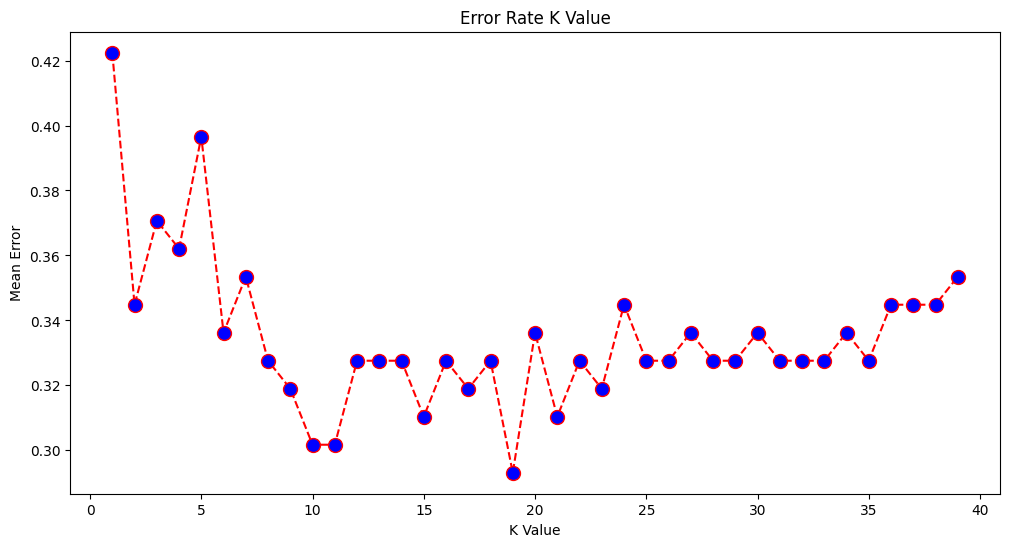

In [ ]:
#Finding the best k-value
error = []
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, Y_train)
    pred_i = model.predict(X_test)
    error.append(np.mean(pred_i != Y_test))
    print(np.mean(pred_i != Y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

This helps us to determine the optimal value of K for the KNN classifier based on the mean error rate. The K value with the lowest mean error rate on the test set may be considered the best choice for the classifier. This process is commonly known as hyperparameter tuning.






In [ ]:
#Training
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 19, metric = 'minkowski', p = 2)
model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=19)

This creates a KNN classifier object with 19 neighbors, using the Minkowski distance metric with p=2 (which corresponds to Euclidean distance). Then, it trains the classifier using the provided training data and labels. Once trained, the model is ready to make predictions on new, unseen data.

In [ ]:
#Prediction for all the test data
Y_pred_new = model.predict(X_test)
print(np.concatenate((Y_pred_new.reshape(len(Y_pred_new),1), Y_test.reshape(len(Y_test),1)),1))

[[0 1]
 [0 0]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]]


This printed output provides a side-by-side comparison between the predicted labels and the actual labels for the test dataset. It helps in assessing the performance of the KNN classifier by observing how well the predicted labels match the true labels. Misclassifications and the overall accuracy of the model can be inferred from this comparison.

#### *Confusion matrix*

Confusion Matrix:
 [[72  5]
 [29 10]]
Accuracy of the Model: 70.6896551724138%


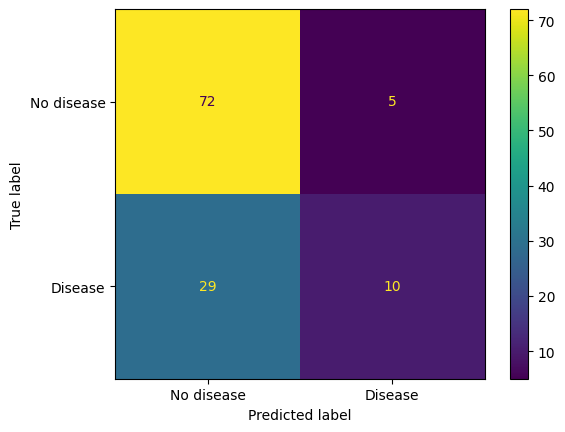

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
conf_matrix = confusion_matrix(Y_test, Y_pred_new)
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy of the Model: {0}%".format(accuracy_score(Y_test, Y_pred_new)*100))
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=['No disease','Disease'])
cm_display.plot()

Accuracy is a common evaluation metric used to measure the overall performance of a classification model. It represents the proportion of correctly classified instances out of the total instances evaluated. The accuracy of our model is 70.68%.

The confusion matrix tells us that:

The true positive rate is 10, that is, 10 people have CHD and are correctly predicted to have CHD.

The false positive rate is 5, that is, 5 people do not have CHD and are wrongly predicted to have CHD.

The false negative rate is 29, that is, 29 people have CHD but are wrongly predicted to not have CHD.

The true negative rate is 72, that is, 72 people do not have CHD and are correctly predicted to have CHD.

#### *Precision and Recall*

In [ ]:
# Metrics
TP = 10
TN = 72
FP = 5
FN = 29

precision = TP/(TP+FP)
recall = TP/(TP+FN)

print("Presicion of the model : ",precision)
print("Recall of the model :",recall)

Presicion of the model :  0.6666666666666666
Recall of the model : 0.2564102564102564


Precision is a measure of the accuracy of the positive predictions made by the model. The precision value of 0.66 implies that 66.6% of the predicted positive cases are actually positive. Precision focuses on the accuracy of positive predictions, emphasizing the model's ability to avoid false positives.

Recall, also known as sensitivity or true positive rate, measures the ability of the model to find all the positive instances in the dataset. The recall value of 0.256 implies that 25.6% of the actual positive cases are correctly predicted as positive. Recall focuses on the model's ability to capture all positive instances, emphasizing the avoidance of false negatives.

## ***Conclusion***

K-Nearest Neighbors (KNN) modeling is widely applicable in various real-life scenarios due to its simplicity, flexibility, and effectiveness. In healthcare, KNN can assist in medical diagnosis by analyzing patient data to predict diseases or conditions based on similar cases. For instance, it can predict the likelihood of a patient developing a particular ailment based on their symptoms, medical history, and demographic information. Additionally, KNN finds utility in recommendation systems, where it suggests items or services based on the preferences and behaviors of similar users. In finance, KNN can help in credit scoring and fraud detection by identifying patterns in transaction data. Its adaptability across diverse domains makes KNN a valuable tool for data-driven decision-making, offering insights and predictions that contribute to enhanced efficiency and informed choices in various real-world applications.